In [38]:
import gym
import numpy as np
import time 
import matplotlib.pyplot as plt

In [39]:
env = gym.make('CartPole-v0')
print(env.action_space) #[Output: ] Discrete(2)
print(env.observation_space) # [Output: ] Box(4,)

Discrete(2)
Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


In [40]:
# returns an initial observation
env.reset()

for i in range(10):

  # env.action_space.sample() produces either 0 (left) or 1 (right).
  action = env.action_space.sample()
  observation, reward, done, info = env.step(action)

  print("step", i, ":", action, observation, reward, done, info)
  if done:
    print("Finished after {} timesteps".format(i+1))
    break

env.close()

step 0 : 0 [ 0.03112092 -0.1795856   0.00252976  0.34147933] 1.0 False {}
step 1 : 0 [ 0.0275292  -0.37474346  0.00935935  0.6349589 ] 1.0 False {}
step 2 : 0 [ 0.02003434 -0.5699947   0.02205853  0.9305746 ] 1.0 False {}
step 3 : 1 [ 0.00863444 -0.3751773   0.04067002  0.64490426] 1.0 False {}
step 4 : 0 [ 0.0011309  -0.5708417   0.05356811  0.95011187] 1.0 False {}
step 5 : 1 [-0.01028594 -0.37648013  0.07257034  0.6747292 ] 1.0 False {}
step 6 : 0 [-0.01781554 -0.5725316   0.08606493  0.9893493 ] 1.0 False {}
step 7 : 1 [-0.02926617 -0.3786606   0.10585191  0.724891  ] 1.0 False {}
step 8 : 0 [-0.03683938 -0.5750747   0.12034974  1.0489255 ] 1.0 False {}
step 9 : 1 [-0.04834088 -0.38173717  0.14132825  0.7963144 ] 1.0 False {}


In [41]:
def Qtable(state_space,action_space,bin_size = 30):
    
    bins = [np.linspace(-4.8,4.8,bin_size),
            np.linspace(-4,4,bin_size),
            np.linspace(-0.418,0.418,bin_size),
            np.linspace(-4,4,bin_size)]
    
    q_table = np.zeros(([bin_size] * state_space + [action_space]))
    #q_table = np.random.uniform(low=-1,high=1,size=([bin_size] * state_space + [action_space]))
    
    return q_table, bins

In [42]:
def Discrete(state, bins):
    index = []
    for i in range(len(state)): index.append(np.digitize(state[i],bins[i]) - 1)
    return tuple(index)

In [43]:
def Q_learning(q_table, bins, episodes, gamma, lr, timestep, start_epsilon):
    
    runs = [0]  # list of cumulative reward per episode
    data = {'reward': [], 'max' : [], 'avg' : [], 'epsilon' : [start_epsilon], 'gamma' : gamma, 'lr' : lr}
    rewards = 0
    steps = 0
    solved = False

    for episode in range(1,episodes+1):
        ep_start = time.time()
        steps += 1 

        epsilon_list = np.linspace(start_epsilon, 0, episodes)  # make epsilon decay to 0 linearly
        epsilon = epsilon_list[episode-1]

        current_state = Discrete(env.reset(),bins)

        score = 0
        done = False
        while not done:
            # if episode % timestep==0: env.render()
            if np.random.uniform(0,1) < epsilon:  # if random number is less than epsilon, choose random action
                    action = env.action_space.sample()
            else: # otherwise choose max reward action
                action = np.argmax(q_table[current_state])

            observation, reward, done, __ = env.step(action)  # take chosen action
            new_state = Discrete(observation,bins)
            score += reward 
            
            if not done:
                max_future_q = np.max(q_table[new_state])  # best estimated reward at current state
                current_q = q_table[current_state+(action,)]
                new_q = (1-lr)*current_q + lr*(reward + gamma*max_future_q)
                q_table[current_state+(action,)] = new_q

            current_state = new_state
            
        # End of the loop update
        else:
            rewards += score
            runs.append(score)

            if score > 195 and steps >= 100 and solved == False:
                solved = True
                print('First solved in episode : {} in time {}'.format(episode, (time.time()-ep_start)))
                
        data['reward'].append(rewards)
        # Timestep value update
        if episode % timestep == 0:
            print('Episode : {} | Avg. reward -> {} | Max reward : {} | Epsilon : {} | Time : {}'.format(episode, rewards/timestep, max(runs), epsilon, time.time() - ep_start))
            data['max'].append(max(runs))
            data['avg'].append(rewards/timestep)
            data['epsilon'].append(epsilon)
            rewards, runs= 0, [0]

    env.close()

    return q_table, data

********** gamma : 0.5, lr : 0.15, epsilon : 0.2 **********
Episode : 100 | Avg. reward -> 11.09 | Max reward : 18.0 | Epsilon : 0.19801980198019803 | Time : 0.0
Episode : 200 | Avg. reward -> 11.25 | Max reward : 18.0 | Epsilon : 0.19601960196019602 | Time : 0.0
Episode : 300 | Avg. reward -> 11.06 | Max reward : 20.0 | Epsilon : 0.19401940194019404 | Time : 0.0009975433349609375
Episode : 400 | Avg. reward -> 10.71 | Max reward : 18.0 | Epsilon : 0.19201920192019203 | Time : 0.0
Episode : 500 | Avg. reward -> 11.28 | Max reward : 19.0 | Epsilon : 0.19001900190019003 | Time : 0.0009980201721191406
Episode : 600 | Avg. reward -> 11.38 | Max reward : 23.0 | Epsilon : 0.18801880188018802 | Time : 0.0
Episode : 700 | Avg. reward -> 12.17 | Max reward : 17.0 | Epsilon : 0.18601860186018604 | Time : 0.0009970664978027344
Episode : 800 | Avg. reward -> 12.05 | Max reward : 20.0 | Epsilon : 0.18401840184018403 | Time : 0.0009553432464599609
Episode : 900 | Avg. reward -> 12.44 | Max reward : 

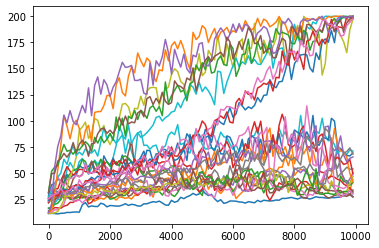

In [44]:
# define parameters
episodes = 10000
gamma = [0.5, 0.8, 0.99]
lr = [0.15, 0.25, 0.35]
timestep = 100
start_epsilon = [0.2, 0.5, 0.8]
q_table_list = []
data_list = []

ep = [i for i in range(0, episodes + 1, timestep)]  # for plotting - list of episode number
# run Q learning
for g in gamma:
    for l in lr:
        for e in start_epsilon:
            print("********** gamma : {}, lr : {}, epsilon : {} **********".format(g, l, e))
            Q, bins = Qtable(4, 2, bin_size=30)
            q_table, data = Q_learning(Q, bins, episodes, g, l, timestep, e)
            q_table_list.append(q_table)
            data_list.append(data)
            ep = [i for i in range(0, episodes, timestep)]  # list of episode number
            plt.plot(ep, data['avg'], label='gamma = {} lr = {} epsilon = {}'.format(g, l, e))

np.save('data_list', data_list)

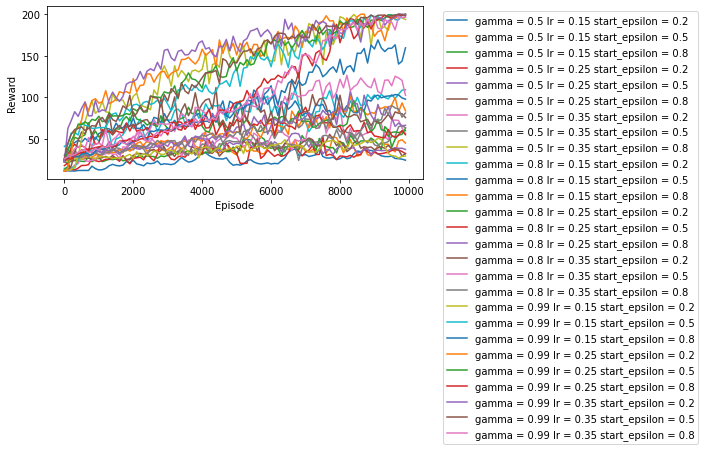

In [45]:
# load q_table_list and data_list
data_list = np.load('data_list_2.npy', allow_pickle=True)

# plot all items in data_list
ep = [i for i in range(0, episodes, timestep)] 
plt.figure(figsize=(10,5))
for i in range(len(data_list)):
    plt.plot(ep, data_list[i]['avg'], label='gamma = {} lr = {} start_epsilon = {}'.format(data_list[i]['gamma'], data_list[i]['lr'], data_list[i]['epsilon'][0]))
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.show()

In [46]:
# print parameters with highest average return
max_avg = max(data['avg'])
for i in range(len(data_list)):
    if data_list[i]['avg'][-1] == max_avg:
        print("********** gamma : {}, lr : {}, epsilon : {} **********".format(data_list[i]['gamma'], data_list[i]['lr'], data_list[i]['epsilon'][0]))
        print("Max reward : {}".format(data_list[i]['max'][-1]))
        print("Average reward : {}".format(data_list[i]['avg'][-1]))
        print("Epsilon : {}".format(data_list[i]['epsilon'][0]))
        print("Time : {}".format(data_list[i]['avg'][-1]))
        print("**********")

(0.0, 1.0)

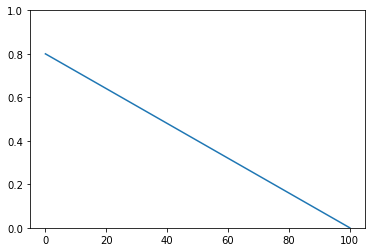

In [47]:
# plot epsilon decay
plt.plot(range(len(data['epsilon'])), data['epsilon'], label = 'Epsilon')
plt.ylim(0, 1)